In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## IMPORTING LIBRARIES

In [3]:
df = pd.read_csv("amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {df.shape}")

Dataset shape : (3150, 5)


In [4]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
len(df)

3150

## EXPLORATORY DATA ANALYSIS

In [6]:
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64


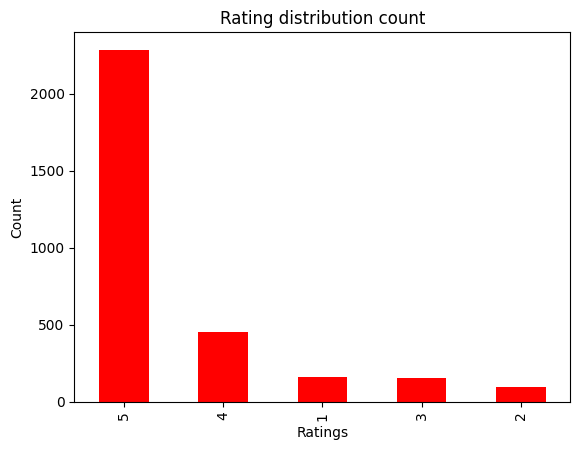

In [7]:
df['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [9]:
print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: count, dtype: float64


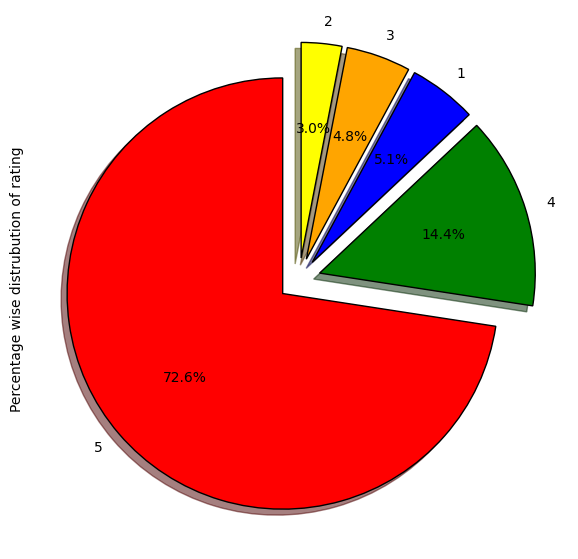

In [10]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['rating'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [11]:
print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     257
Name: count, dtype: int64


In [12]:
review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [13]:
review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


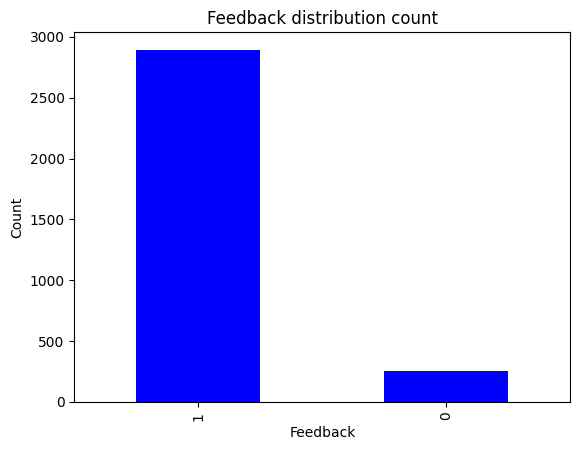

In [14]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


In [15]:
print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.84
0     8.16
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

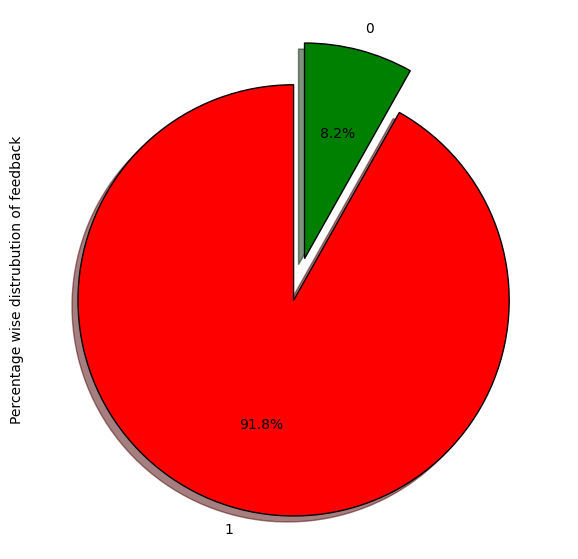

In [16]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['feedback'].value_counts()/df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

#### TYPE OF RATINGS HAVING FEEDBACK EQUAL TO 0 AND THE NO OF SUCH RATINGS

In [17]:
df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     96
Name: count, dtype: int64

#### TYPE OF RATINGS HAVING FEEDBACK EQUAL TO 0 AND THE NO OF SUCH RATINGS

In [18]:
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [19]:
print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


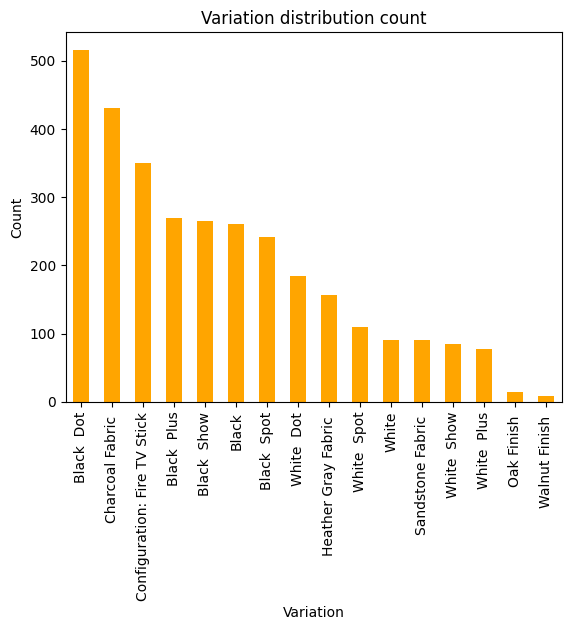

In [20]:
df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [21]:
print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [22]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

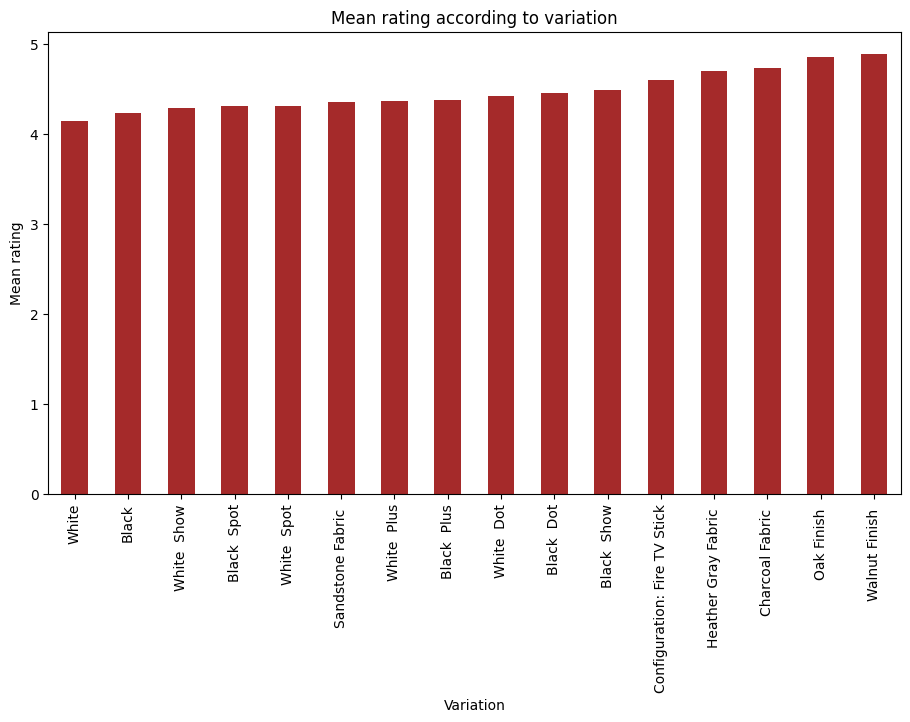

In [23]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [24]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df["verified_reviews"].values.astype('U'))

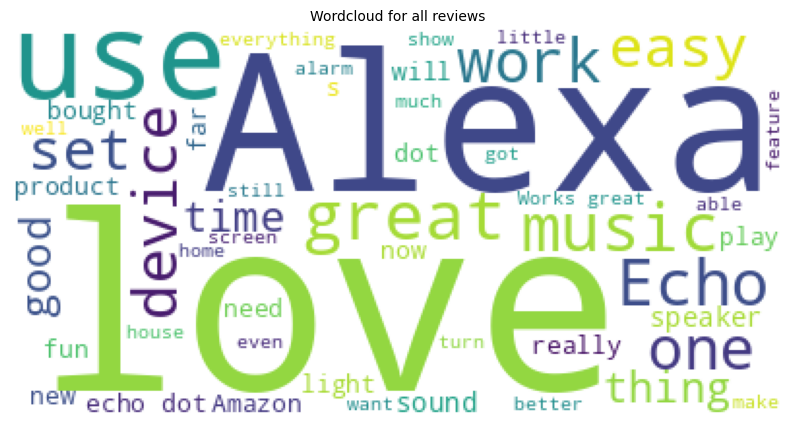

In [25]:
reviews = " ".join([str(review) for review in df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [26]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([str(review) for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([str(review) for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

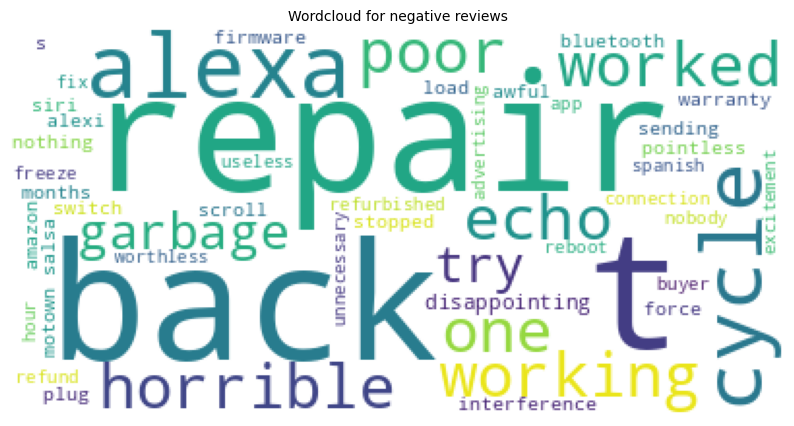

In [27]:

wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

## DATA PREPROCESSING AND MODEL BUILDING

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [32]:
reviews = df.copy()

In [33]:
reviews.reset_index(inplace = True)

In [34]:
reviews['verified_reviews'][0]

'Love my Echo!'

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, len(reviews)):
  review = re.sub('[^a-zA-Z]', ' ', reviews['verified_reviews'][0])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [37]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = df["feedback"].values

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [39]:
print("X_train-shape : ",X_train.shape)
print("y_train-shape : ",y_train.shape)
print("X_test-shape : ",X_test.shape)
print("y_test-shape : ",y_test.shape)

X_train-shape :  (2204, 2)
y_train-shape :  (2204,)
X_test-shape :  (945, 2)
y_test-shape :  (945,)


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
df.head(4)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scalar = MinMaxScaler()
X_train_scl = scalar.fit_transform(X_train)
X_test_scl = scalar.fit_transform(X_test)

#### USING MULTINOMIAL NAIVE BAIYES

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model = MultinomialNB()
model.fit(X_train_scl,y_train)

MultinomialNB()

In [46]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model.score(X_train_scl, y_train))
print("Testing Accuracy :", model.score(X_test_scl, y_test))

Training Accuracy : 0.9192377495462795
Testing Accuracy : 0.9174603174603174


In [47]:
y_predict = model.predict(X_test_scl)

In [48]:
y_predict[1]

1

In [49]:
y[1]

1

In [50]:
cm = confusion_matrix(y_test,y_predict)

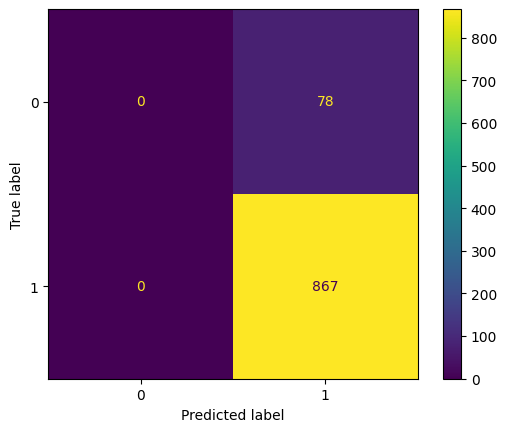

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
cm_display.plot()
plt.show()

#### USING RANDOM FOREST CLASSIFIER

In [52]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_scl,y_train)

RandomForestClassifier()

In [53]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_rfc.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rfc.score(X_test_scl, y_test))

Training Accuracy : 0.9192377495462795
Testing Accuracy : 0.9174603174603174


In [54]:
y_predict_rf = model_rfc.predict(X_test_scl)

In [55]:
cm1 = confusion_matrix(y_test,y_predict_rf)

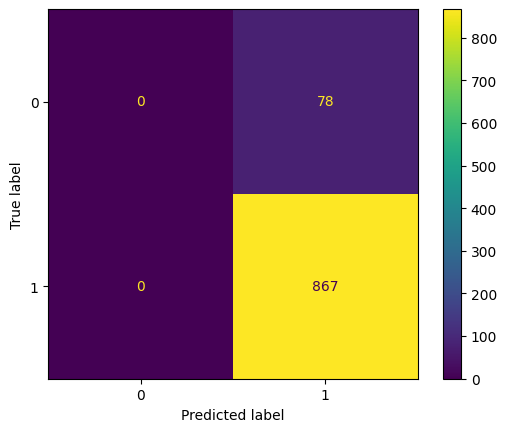

In [56]:
cm1_display = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model_rfc.classes_)
cm1_display.plot()
plt.show()

In [57]:
params = {
    'bootstrap':[True],
    'max_depth':[80,100],
    'min_samples_split':[8,12],
    'n_estimators':[100,300]
}

In [58]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rfc,param_grid = params,cv = cv_object,verbose = 0,return_train_score = True)
grid_search.fit(X_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [59]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [60]:
accuracies = cross_val_score(estimator = model_rfc, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9192389962978197
Standard Variance : 0.0017519789919209791


In [61]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_predict))

Cross validation mean accuracy on train set : 91.92377495462794
Cross validation mean accuracy on test set : 91.92377495462794
Accuracy score for test set : 0.9174603174603174


#### USING XGBOOST CLASSIFIER

In [62]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:

#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9192377495462795
Testing Accuracy : 0.9174603174603174


In [64]:
y_preds = model_xgb.predict(X_test)

In [65]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  0  78]
 [  0 867]]


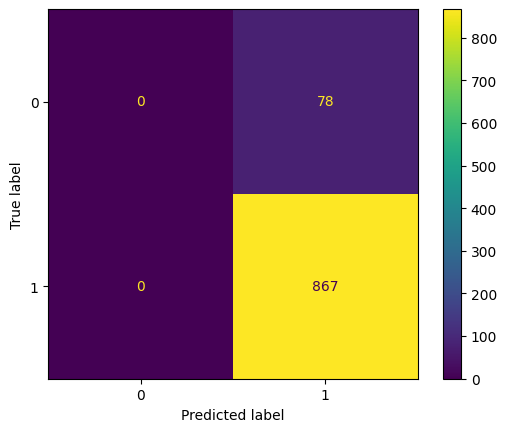

In [66]:

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

#### USING DECISION TREE CLASSIFIER

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_dtc = DecisionTreeClassifier()

In [69]:
model_dtc.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [70]:
print("Training Accuracy : ",model_dtc.score(X_train_scl,y_train))
print("Testing Accuracy  :  ",model_dtc.score(X_test,y_test))

Training Accuracy :  0.9192377495462795
Testing Accuracy  :   0.9174603174603174


In [71]:
y_predict = model_dtc.predict(X_test)

In [72]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[  0  78]
 [  0 867]]


In [73]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels= model_dtc.classes_)

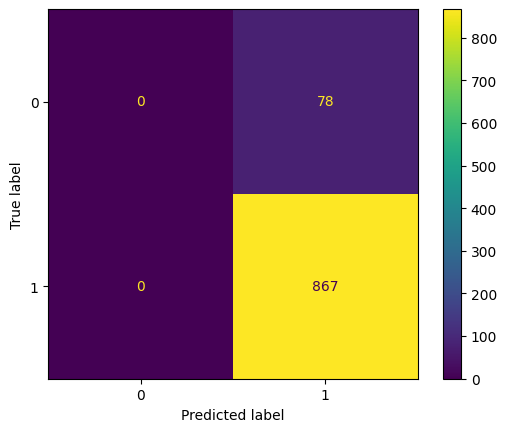

In [74]:
cm_display.plot()
plt.show()